# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# Importing data set

In [2]:
df=pd.read_csv('ubersuggest_google.csv')
dt=df.copy()

In [3]:
print(dt)

     No            Keyword  Search Volume    CPC  Paid Difficulty  \
0     1             google       83100000  $1.19                1   
1     2   google translate       37200000  $0.82                1   
2     3   google classroom       24900000  $0.09                4   
3     4        google maps       24900000  $0.59                1   
4     5        google docs       20400000  $0.59                1   
..  ...                ...            ...    ...              ...   
95   96  google extensions          74000  $0.34                1   
96   97       google timer          74000  $1.18                1   
97   98     google express          74000  $0.60                9   
98   99  google dictionary          74000  $1.87                1   
99  100   google nest mini          74000  $0.54               83   

    Search Difficulty  
0                  61  
1                  48  
2                  49  
3                  48  
4                  48  
..                ...  
95 

In [4]:
x=dt.iloc[:,1:3]
y=dt.iloc[:,3:4]
x1=dt.iloc[:,4:]
x=pd.concat([x,x1], axis=1, join='inner')
print(x)
print(y)

              Keyword  Search Volume  Paid Difficulty  Search Difficulty
0              google       83100000                1                 61
1    google translate       37200000                1                 48
2    google classroom       24900000                4                 49
3         google maps       24900000                1                 48
4         google docs       20400000                1                 48
..                ...            ...              ...                ...
95  google extensions          74000                1                 41
96       google timer          74000                1                 41
97     google express          74000                9                 43
98  google dictionary          74000                1                 41
99   google nest mini          74000               83                 61

[100 rows x 4 columns]
      CPC
0   $1.19
1   $0.82
2   $0.09
3   $0.59
4   $0.59
..    ...
95  $0.34
96  $1.18
97  $0.60


## EDA

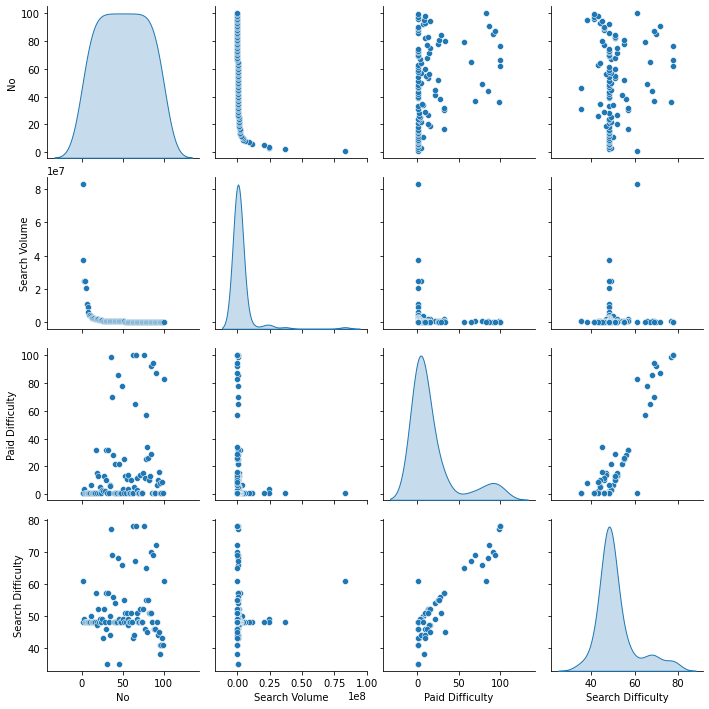

In [5]:
sns.pairplot(data=dt, diag_kind='kde')

# Handling the categorical varible

## by using the LabelEncoder

In [6]:
labelencoder = LabelEncoder()
x['Keyword'] = labelencoder.fit_transform(x['Keyword'])

In [7]:
print(x['Keyword'].describe())

count    100.000000
mean      49.500000
std       29.011492
min        0.000000
25%       24.750000
50%       49.500000
75%       74.250000
max       99.000000
Name: Keyword, dtype: float64


In [8]:
y=y.CPC.str.replace("[$]", "", regex=True)
y=y.astype(float)
print(x)
print(y)

    Keyword  Search Volume  Paid Difficulty  Search Difficulty
0         2       83100000                1                 61
1        92       37200000                1                 48
2        20       24900000                4                 49
3        61       24900000                1                 48
4        25       20400000                1                 48
..      ...            ...              ...                ...
95       34          74000                1                 41
96       90          74000                1                 41
97       33          74000                9                 43
98       23          74000                1                 41
99       68          74000               83                 61

[100 rows x 4 columns]
0     1.19
1     0.82
2     0.09
3     0.59
4     0.59
      ... 
95    0.34
96    1.18
97    0.60
98    1.87
99    0.54
Name: CPC, Length: 100, dtype: float64


# Building the model....

## spliting the data into training set and testing set

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

## Training the linear regression model and analyzing the error rate

In [10]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

regressor=LinearRegression()
regressor.fit(x_train,y_train)
pred=regressor.predict(x_test)
r2_score(y_test, pred), mean_absolute_error(y_test, pred), np.sqrt(mean_squared_error(y_test, pred))

(-0.31895574008961614, 1.2845421769958514, 1.7448342501252447)

## Training the DecisionTree Regression model and analyzing the error rate

In [11]:

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
yhat = dt.predict(x_test)
r2_score(y_test, yhat), mean_absolute_error(y_test, yhat), np.sqrt(mean_squared_error(y_test, yhat))

(-1.6519200277602057, 1.7508, 2.4741115577111716)

In [12]:
s=labelencoder.transform(['google timer'])
print(s[0])
sample=[s[0],74000,1,41]
pred=dt.predict([sample])
print(pred)

90
[1.18]


/home/akhil/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


## Dumping the model

In [13]:
# creating the pickle file for labelencoding
pickle.dump(labelencoder,open('labelencoder_model.pkl','wb'))


# creating the pickle file for DecisionTreeRegressor
pickle.dump(dt,open('dt_model.pkl','wb'))

In [ ]:
# # performing feature scaling techniques to scale down the data
# # the most popular methods used in feature scaling are
# # 1-> MinMaxScaler 2-> StandardScaler

data=x.copy()
lis=list(data.columns)

from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scale.fit(data[lis])


# from sklearn.preprocessing import MinMaxScaler
# scale=MinMaxScaler()
# scale.fit(data[lis])


# # # saving the model for future scaling on the prediction data

pickle.dump(scale,open('scaling_model.pkl','wb'))
scale=pickle.load(open('scaling_model.pkl','rb'))
data=pd.DataFrame(scale.transform(data[lis]),columns=lis)
print(data.describe())
print(data)

x=data.copy()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
yhat = dt.predict(x_test)
r2_score(y_test, yhat), mean_absolute_error(y_test, yhat), np.sqrt(mean_squared_error(y_test, yhat))

In [ ]:
s=labelencoder.transform(['google timer'])
print(s[0])
sample=[s[0],74000,1,41]
pred=dt.predict([sample])
print(pred)